# Handwritten digits classificatin with CNN and Keras

### Step 1: Lets load our dataset

In [6]:
from keras.datasets import mnist

# loads our dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of **60,000** samples of training data, **10,000** samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are **28 x 28**, with **no color channels** (i.e. they are grayscale, so no BGR channels)

In [7]:
print('Initial shape of x_train: ', str(x_train.shape))
print()
print('Number of samples in x_train: ', str(len(x_train)))
print('Number of labels in y_train: ', str(len(y_train)))
print('Number of samples in x_test: ', str(len(x_test)))
print('Number of labels in y_test: ', str(len(y_test)))
print()
print('Dimensions of x_train: ', str(x_train[0].shape))
print('Dimensions of y_train: ', str(y_train.shape))
print()
print('Dimensions of x_test: ', str(x_test[0].shape))
print('Labels shape of y_test: ', str(y_test.shape))

Initial shape of x_train:  (60000, 28, 28)

Number of samples in x_train:  60000
Number of labels in y_train:  60000
Number of samples in x_test:  10000
Number of labels in y_test:  10000

Dimensions of x_train:  (28, 28)
Dimensions of y_train:  (60000,)

Dimensions of x_test:  (28, 28)
Labels shape of y_test:  (10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [8]:
# using opencv
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

for i in range(0, 6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  window_name = 'Random Image from trains set #' + str(i)
  cv2_imshow(img)
  cv2.waitKey(0)

cv2.destroyAllWindows()

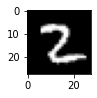

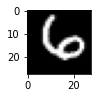

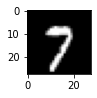

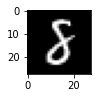

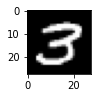

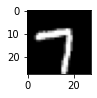

In [9]:
# using matplotlib
import matplotlib.pyplot as plt

random_num_list = [np.random.randint(0, len(x_train)) for i in range(0, 6)]
subplot_num = 331

for i in random_num_list:
  plt.subplot(subplot_num)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  subplot_num += 1
  plt.show()

### Step 3A - Prepare our dataset for training

In [10]:
# storing the rows and cols number
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Storing the shape of a single image
input_shape = (img_rows, img_cols, 1)

# converting the input shape into float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing our data
x_train /=255
x_test /=255

# printing the shape of the data
print('Shape of x_train: ', str(x_train.shape))

Shape of x_train:  (60000, 28, 28, 1)


### Step 3B - One Hot Encode Our Labels (Y)

In [11]:
from keras.utils import np_utils

# one hot encoding the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# printing the y_train shape
print('Number of classes in y_train: ', str(y_train.shape[1]))

num_classes = y_train.shape[1]
num_pixels = img_rows * img_cols

Number of classes in y_train:  10


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x3
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [13]:
# importing the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [14]:
# creating the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(x_train, 
                    y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.5897 - accuracy: 0.8137 - val_loss: 0.2065 - val_accuracy: 0.9382
Epoch 2/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.3006 - accuracy: 0.9090 - val_loss: 0.1387 - val_accuracy: 0.9586
Epoch 3/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2279 - accuracy: 0.9319 - val_loss: 0.1049 - val_accuracy: 0.9679
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1799 - accuracy: 0.9474 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 5/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1463 - accuracy: 0.9571 - val_loss: 0.0677 - val_accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1228 - accuracy: 0.9635 - val_loss: 0.0611 - val_accuracy: 0.9805
Epoch 7/10
60000/60000 [==============================] - 167s

### Step 6 - Ploting our Loss and Accuracy Charts

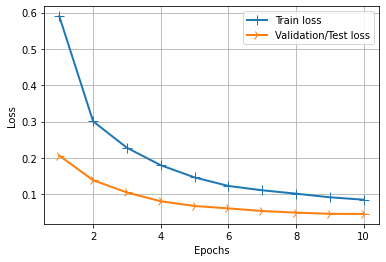

In [ ]:
# plotting the accuracy and loss charts

history_dict = history.history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
epochs = range(1, len(train_loss) + 1)

line1 = plt.plot(epochs, train_loss, label='Train loss')
line2 = plt.plot(epochs, validation_loss, label='Validation/Test loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

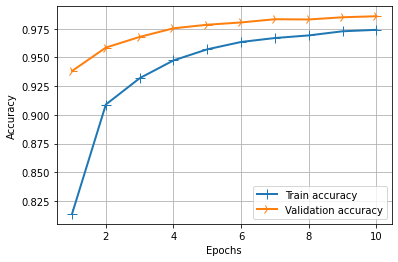

In [ ]:
# plotting accuracy charts
train_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

line1 = plt.plot(epochs, train_accuracy, label='Train accuracy')
line2 = plt.plot(epochs, validation_accuracy, label='Validation accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [ ]:
model.save('/content/drive/My Drive/Deep Learning CV projects/Models/mnist_simple_cnn_handwritten_model.h5')
print('Model Saved')

Model Saved


### Step 7B - Loading out saved model

In [2]:
from keras.models import load_model

classifier = load_model('/content/drive/My Drive/Deep Learning CV projects/Models/mnist_simple_cnn_handwritten_model.h5')

### Step 8: Making some predictions

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [17]:
# helper function to draw the predicions
def draw_test(name, pred, input_img):
  BLACK = [0, 0, 0]
  expanded_img = cv2.copyMakeBorder(input_img, 0, 0, 0, imageL.shape[0], 
                                    cv2.BORDER_CONSTANT, value=BLACK)
  expanded_img = cv2.cvtColor(expanded_img, cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_img, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 4)
  cv2_imshow(expanded_img)


In [22]:
(x_train_v, y_train_v), (x_test_v, y_test_v) = mnist.load_data()

Original Image


Predicted Image


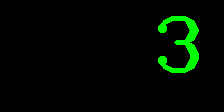

Original Image


Predicted Image


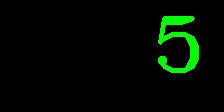

Original Image


Predicted Image


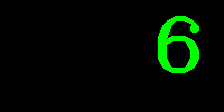

Original Image


Predicted Image


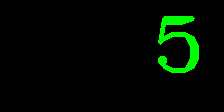

Original Image


Predicted Image


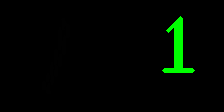

Original Image


Predicted Image


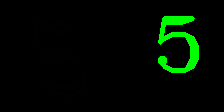

Original Image


Predicted Image


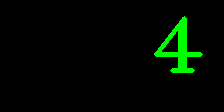

Original Image


Predicted Image


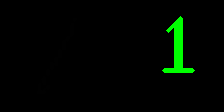

Original Image


Predicted Image


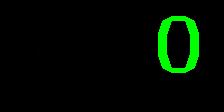

Original Image


Predicted Image


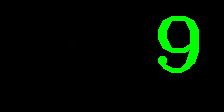

In [23]:
for i in range(0, 10):
  random_num = np.random.randint(0, len(x_test))
  input_img = x_test[random_num]
  display_img = x_test_v[random_num]
  imageL = cv2.resize(input_img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
  input_img = input_img.reshape(1, 28, 28, 1)
  print('Original Image')
  cv2_imshow(display_img)
  # getting predictions
  result = str(classifier.predict_classes(input_img, 1, verbose=0)[0])

  print('Predicted Image')
  draw_test("Prediction", result, imageL)
  cv2.waitKey(0)

cv2.destroyAllWindows()

### visulaizing our model

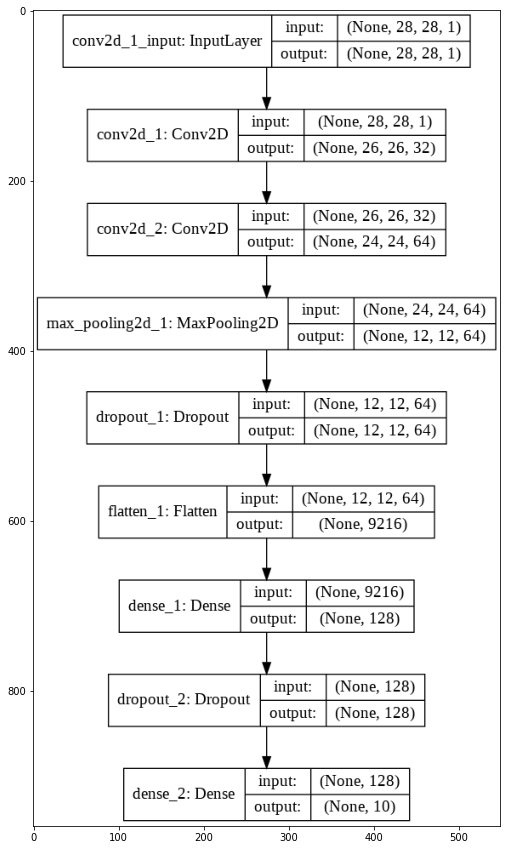

In [26]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

model_path = '/content/drive/My Drive/Deep Learning CV projects/Models/'

plot_model(model, to_file=model_path + 'handwritten_model_plot.png',
           show_shapes=True, 
           show_layer_names=True)

plot_img = mpimg.imread(model_path + 'handwritten_model_plot.png')
plt.figure(figsize=(30, 15))
plt.imshow(plot_img)